# K-Means Clustering
#K-No.of clusters

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')
x=dataset.iloc[:,[3,4]].values
#select the features which are capable enough to identify clusters
#Here for teaching purpose, inorder to visualize in 2D plot we just take 2 features only
#before modeling we don't have any dependent variable 'y'.

In [3]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Using the elbow method to find the optimal number of clusters

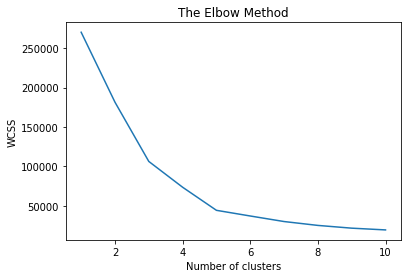

In [4]:
#elbow method-can find K
#WCSS(Within Cluster Sum of Squares)-
#sum of distance of all(pi,c1)**2(pi-all points in cluster with centroid c1)
from sklearn.cluster import KMeans
#using for loop to do KMeans using 1 to 10 clusters and we will calculate WCSS each time
WCSS=[]
for i in range(1,11):
    #train and run KMeans algorithm
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    #init='k-means++' is used to avoid random initialization trap
    kmeans.fit(x)
    #finding WCSS value
    WCSS.append(kmeans.inertia_)#inertia_ is the attribute of kmeans object, it will give WCSS value
#plotting the graph
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [5]:
#from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans_pred=kmeans.fit_predict(x)
#fit_predict method will train the model and predict dependent variable
#finding the value of dependent variable(group)(here cluster 1,cluster 2,cluster 3,cluster 4,cluster 5)

In [6]:
print(y_kmeans_pred)#index of clusters=0,1,2,3,4
#customer id 1 belongs to fourth cluster(index=3), id 2 belongs to cluster 1(index=0)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Visualising the clusters

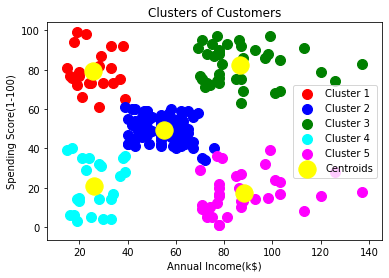

In [7]:
plt.scatter(x[y_kmeans_pred==0,0],x[y_kmeans_pred==0,1],s=100,c='red',label='Cluster 1')
#in case of dots in cluster 1, we are taking x with column 1(x[0]) and rows which have the cluster value of 0
#s=size of dots, c=color of dots
plt.scatter(x[y_kmeans_pred==1,0],x[y_kmeans_pred==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans_pred==2,0],x[y_kmeans_pred==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(x[y_kmeans_pred==3,0],x[y_kmeans_pred==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(x[y_kmeans_pred==4,0],x[y_kmeans_pred==4,1],s=100,c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='Yellow',label='Centroids')
#cluster_centers_is a 2D array,in which rows corresponding to centroids
#and columns corresponding to their co-ordinates(x&y)
#cluster_centers_[:,0]-x co-ordinates
#cluster_centers_[:,1]-y co-ordinates
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()#to see the labels of clusters
plt.show()
